In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
Nbins_inu = 10
Nbins2_inu = 20
Nbins3_inu = 30
Nbins4_inu = 40
Nbins5_inu = 50
Nbins6_inu = 60
G_eff_vec = [1e-4, 1e-3, 1e-2, 1e-1]
cvis2_vec = [1./4., 1./8.,0]
qmax

In [4]:
Standard = Class() 
Standard.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.00, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
Standard.compute()

In [5]:
NoInt = Class() 
NoInt.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0., 
           'tol_inu_synchronous' : 10,
           'l_max_inu':15,
           'qmax_inu':12.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
NoInt.compute()
print NoInt.Neff

<built-in method Neff of classy.Class object at 0x38a6720>


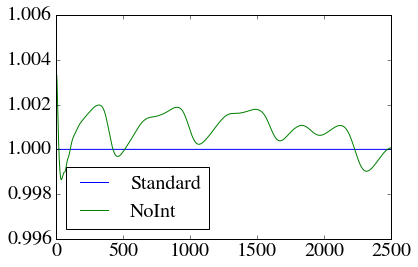

In [6]:
PlotModels = ['Standard','NoInt']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=M)
plt.ylim([0.996,1.006])
plt.legend(loc='lower left')
#plt.savefig("StandardNoInt.pdf", bbox_inches='tight')

cosmo = Class()
cosmo.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
           'N_inu': 3.0,
           'N_ur' : 0.0,
           'YHe' : 0.25,
           'k_output_values' : '1e-4, 1e-2, 1.0',
           'G_eff' : 1e-7,
           'tol_inu_synchronous' : 1e-1})
cosmo.compute()

In [7]:
CYR = {}
for G in G_eff_vec:
    CYR[G] = Class() 
    CYR[G].set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff_CYR' : G, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
    CYR[G].compute()

In [8]:
Cvis2Ceff2 = {}
for cvis2 in cvis2_vec:
    Cvis2Ceff2[cvis2] = Class() 
    Cvis2Ceff2[cvis2].set({'output':'tCl mPk dTk vTk', 
               'N_ncdm' : 0, 
               'N_inu': 0.0, 
               'N_ur' : 3.0, 
               'ceff2_ur': 1./3.,
               'cvis2_ur' : cvis2,
               'YHe' : 0.25, 
               'k_output_values' : '1e-4, 1e-2, 1.0', 
               'G_eff' : 0.0, 
               'tol_inu_synchronous' : Nbins_inu,
                 'ur_fluid_approximation':3,
                 'radiation_streaming_approximation':3,
                'background_verbose':5
                 }) 
    Cvis2Ceff2[cvis2].compute()

In [ ]:
ISA = {}
for G in G_eff_vec:
    ISA[G]= Class() 
    ISA[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins_inu,
         'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA[G].compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in G_eff_vec:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA = ISA[G].raw_cl()
    l = cl_ISA['ell'][2:]
    p = plt.plot(l,cl_ISA['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{ISA}, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls='--',color=colour)
#plt.ylim([0.997,1.003])
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
#plt.savefig("CYRvsISA.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
ISA2 = {}
for G in G_eff_vec:
    ISA2[G]= Class() 
    ISA2[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins2_inu,
         'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA2[G].compute()

In [ ]:
ISA3 = {}
for G in G_eff_vec:
    ISA3[G]= Class() 
    ISA3[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins3_inu,
         'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA3[G].compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in G_eff_vec:
    cl_ISA = ISA[G].raw_cl()
    cl_ISA2 = ISA2[G].raw_cl()
    cl_ISA3 = ISA3[G].raw_cl()
    l = cl_ISA['ell'][2:]
    
    p = plt.plot(l,cl_ISA['tt'][2:]/clref['tt'][2:],label=r'$N_q=10, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_ISA2['tt'][2:]/clref['tt'][2:],label=r'$N_q=20, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='--',color=colour)
    plt.plot(l,cl_ISA3['tt'][2:]/clref['tt'][2:],label=r'$N_q=30, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='dotted',color=colour)

#plt.ylim([0.997,1.003])

#plt.ylim([0.997,1.003])
#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
#plt.savefig("IncreasingNq_lmax15_method2.pdf", bbox_inches='tight')

In [ ]:
ISA4 = {}
for G in G_eff_vec:
    ISA4[G]= Class() 
    ISA4[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins4_inu,
         'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA4[G].compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in G_eff_vec:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA3 = ISA3[G].raw_cl()
    cl_ISA4 = ISA4[G].raw_cl()
    l = cl_ISA4['ell'][2:]
    
    p = plt.plot(l,cl_ISA3['tt'][2:]/clref['tt'][2:],label=r'$N_q=30, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='-')
    colour = p[0].get_color()
    plt.plot(l,cl_ISA4['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='-.',color=colour)
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls=':',color="Black",lw=2)

In [ ]:
ISA5 = {}
for G in G_eff_vec:
    ISA5[G]= Class() 
    ISA5[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins5_inu,
         'l_max_inu':15,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA5[G].compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in G_eff_vec:
    cl_CYR = CYR[G].raw_cl()
    cl_ISA3 = ISA3[G].raw_cl()
    cl_ISA4 = ISA4[G].raw_cl()
    cl_ISA5 = ISA5[G].raw_cl()
    l = cl_ISA4['ell'][2:]
    
    p = plt.plot(l,cl_ISA3['tt'][2:]/clref['tt'][2:],label=r'$N_q=30, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':')
    colour = p[0].get_color()
    plt.plot(l,cl_ISA4['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='--',color=colour)
    plt.plot(l,cl_ISA5['tt'][2:]/clref['tt'][2:],label=r'$N_q=50, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='-.',color=colour)
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',
             ls='-',color=colour,lw=2)
    
for cvis2 in cvis2_vec: 
    cl_cvis2 = Cvis2Ceff2[cvis2].raw_cl()
    plt.plot(l,cl_cvis2['tt'][2:]/clref['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls=':',color="Black")
    
#plt.ylim([0.997,1.003])

#plt.ylim([0.997,1.003])
#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
plt.savefig("IncreasingNq_lmax15_method3b.pdf", bbox_inches='tight')

In [ ]:
ISA6= Class() 
ISA6.set({'output':'tCl mPk dTk vTk',
     'evolver':1,
     'N_ncdm' : 0, 
     'N_inu': 3.0, 
     'N_ur' : 0.0, 
     'YHe' : 0.25, 
     'k_output_values' : '1e-4, 1e-2, 1.0', 
     'G_eff' : 1e-2, 
     'tol_inu_synchronous' : 60,
     'l_max_inu':15,
#          'tol_perturb_integration':10000,
     'perturbations_verbose':3}) 
%time ISA6.compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()

for G in (1e-2,1e-2):    
    cl_ISA = ISA[G].raw_cl()
    cl_ISA2 = ISA2[G].raw_cl()
    cl_ISA3 = ISA3[G].raw_cl()
    cl_ISA4 = ISA4[G].raw_cl()
    cl_ISA5 = ISA5[G].raw_cl()
    cl_ISA6 = ISA6.raw_cl()
    l = cl_ISA4['ell'][2:]
    
    plt.plot(l,cl_ISA['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=10, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Black')
    plt.plot(l,cl_ISA2['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=20, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Gray')
    plt.plot(l,cl_ISA3['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=30, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Blue')
    plt.plot(l,cl_ISA4['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=40, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Green')
    plt.plot(l,cl_ISA5['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=50, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Orange')
    plt.plot(l,cl_ISA6['tt'][2:]/clnoint['tt'][2:],label=r'$N_q=50, G_\mathrm{eff}='+"{:g}".format(G)+'$',color='Red')
#plt.ylim([0.997,1.003])
#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))

In [ ]:
#ptsInt1 = Int1.get_perturbations()['scalar']
ptsNoInt = NoInt.get_perturbations()['scalar']
plotvar = 'inu_momentum_conservation'
for G in [1e-3]:
    ptsISA5 = ISA5[G].get_perturbations()['scalar']
    for i in range(1):
        tauISA5 = ptsISA5[i]['z']
        varISA5 = ptsISA5[i][plotvar]
        
        plt.plot(tauISA5,varISA5,ls='-',lw=2,label=r'$G_\mathrm{eff}='+"{:g}".format(G)+'$')
                 
        lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))    

In [ ]:
ISA4b = {}
for G in [1e-2,1e-1]:
    ISA4b[G]= Class() 
    ISA4b[G].set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : G, 
           'tol_inu_synchronous' : Nbins4_inu,
         'l_max_inu':25,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
    %time ISA4b[G].compute()

In [ ]:
Ref = Standard
clref = Ref.raw_cl()
clnoint = NoInt.raw_cl()
    
for G in [1e-2,1e-1]:
    cl_ISA4 = ISA4[G].raw_cl()
    cl_ISA4b = ISA4b[G].raw_cl()
    l = cl_ISA4['ell'][2:]
    
    p = plt.plot(l,cl_ISA4['tt'][2:]/clref['tt'][2:],label=r'$N_q=10, G_\mathrm{eff}='+"{:g}".format(G)+'$')
    colour = p[0].get_color()
    plt.plot(l,cl_ISA4b['tt'][2:]/clref['tt'][2:],label=r'$N_q=20, G_\mathrm{eff}='+"{:g}".format(G)+'$',ls='--',color=colour)

#plt.ylim([0.997,1.003])

#plt.ylim([0.997,1.003])
#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
#plt.savefig("IncreasingNq_lmax15_trapedzoidal.pdf", bbox_inches='tight')

In [10]:
Int12 = Class() 
Int12.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 40,
           'l_max_inu':15,
           'qmax_inu':12.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int12.compute()

In [11]:
Int15 = Class() 
Int15.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 50,
           'l_max_inu':15,
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int15.compute()

In [12]:
Int18 = Class() 
Int18.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 60,
           'l_max_inu':15,
           'qmax_inu':18.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int18.compute()

In [13]:
Int21 = Class() 
Int21.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 70,
           'l_max_inu':15,
           'qmax_inu':21.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int21.compute()

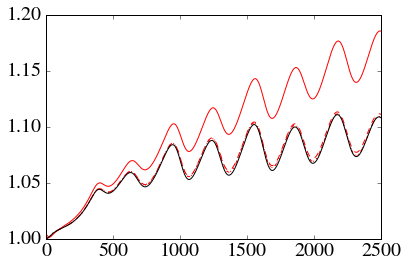

In [22]:
Ref = Standard
clInt12 = Int12.raw_cl()
clInt15 = Int15.raw_cl()
clInt18 = Int18.raw_cl()
clInt21 = Int21.raw_cl()

l = clInt12['ell'][2:]
    
plt.plot(l,clInt12['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=12',color="Red")
plt.plot(l,clInt15['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=15',color="Red",ls='--')
plt.plot(l,clInt18['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=18',color="Red",ls=':')
plt.plot(l,clInt21['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=21',color="Red",ls='-.')

for G in [1e-2]:
    cl_CYR = CYR[G].raw_cl()
    
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',color="Black")
    

In [23]:
Int15b = Class() 
Int15b.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 75,
           'l_max_inu':15,
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int15b.compute()

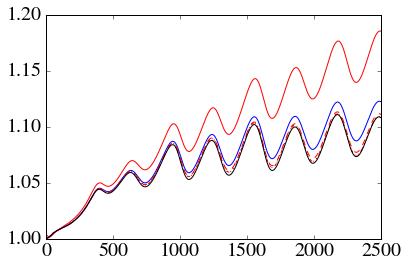

In [24]:
Ref = Standard
clInt12 = Int12.raw_cl()
clInt15 = Int15.raw_cl()
clInt18 = Int18.raw_cl()
clInt21 = Int21.raw_cl()
clInt15b = Int15b.raw_cl()

l = clInt12['ell'][2:]
    
plt.plot(l,clInt12['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=12',color="Red")
plt.plot(l,clInt15b['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.2, q_\mathrm{max}=15',color="Blue")
plt.plot(l,clInt15['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=15',color="Red",ls='--')
plt.plot(l,clInt18['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=18',color="Red",ls=':')
plt.plot(l,clInt21['tt'][2:]/clref['tt'][2:],label=r'$d_q=0.3, q_\mathrm{max}=21',color="Red",ls='-.')

for G in [1e-2]:
    cl_CYR = CYR[G].raw_cl()
    
    plt.plot(l,cl_CYR['tt'][2:]/clref['tt'][2:],label=r'$\mathrm{CYR}, G_\mathrm{eff}='+"{:g}".format(G)+'$',color="Black")

In [25]:
Int15c = Class() 
Int15c.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 100,
           'l_max_inu':15,
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int15c.compute()

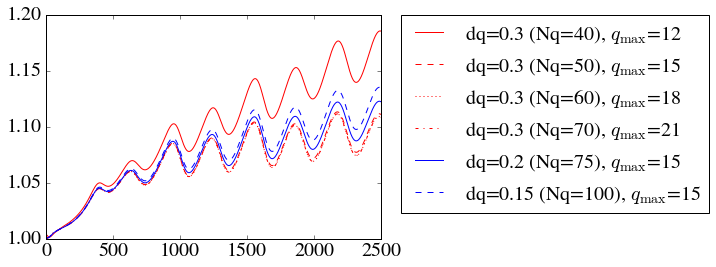

In [33]:
Ref = Standard
clInt12 = Int12.raw_cl()
clInt15 = Int15.raw_cl()
clInt18 = Int18.raw_cl()
clInt21 = Int21.raw_cl()
clInt15b = Int15b.raw_cl()
clInt15c = Int15c.raw_cl()

l = clInt12['ell'][2:]
    
plt.plot(l,clInt12['tt'][2:]/clref['tt'][2:],label=r'dq=0.3 (Nq=40), $q_\mathrm{max}$=12',color="Red")
plt.plot(l,clInt15['tt'][2:]/clref['tt'][2:],label=r'dq=0.3 (Nq=50), $q_\mathrm{max}$=15',color="Red",ls='--')
plt.plot(l,clInt18['tt'][2:]/clref['tt'][2:],label=r'dq=0.3 (Nq=60), $q_\mathrm{max}$=18',color="Red",ls=':')
plt.plot(l,clInt21['tt'][2:]/clref['tt'][2:],label=r'dq=0.3 (Nq=70), $q_\mathrm{max}$=21',color="Red",ls='-.')
plt.plot(l,clInt15b['tt'][2:]/clref['tt'][2:],label=r'dq=0.2 (Nq=75), $q_\mathrm{max}$=15',color="Blue")
plt.plot(l,clInt15c['tt'][2:]/clref['tt'][2:],label=r'dq=0.15 (Nq=100), $q_\mathrm{max}$=15',color="Blue",ls='--')

lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
#plt.savefig("qmax_dq_variation.pdf", bbox_inches='tight')

In [ ]:
Int15d = Class() 
Int15d.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.00, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
           'tol_inu_synchronous' : 150,
           'l_max_inu':15,
           'qmax_inu':15.,
           'qmin_inu':0.1,
           'quadrature_method_inu':1,
#          'tol_perturb_integration':10000,
           'perturbations_verbose':3,
           'background_verbose':1,
           'input_verbose':1})
Int15d.compute()